In [10]:
import pprint
import numpy as np
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

A = scipy.array([[6, 3, 4, 8], 
                 [3, 6, 5, 1], 
                 [4, 5, 10, 7], 
                 [8, 1, 7, 25]])
L = scipy.linalg.cholesky(A, lower=True)
# L = scipy.linalg.cholesky(A)
U = scipy.linalg.cholesky(A, lower=False)

# U = scipy.linalg.cholesky(A, lower=True)

print("A:")
pprint.pprint(A)

print("L:")
pprint.pprint(L)

print("U:")
pprint.pprint(U)

print("p:")
pprint.pprint(L @ U)


A:
array([[ 6,  3,  4,  8],
       [ 3,  6,  5,  1],
       [ 4,  5, 10,  7],
       [ 8,  1,  7, 25]])
L:
array([[ 2.44948974,  0.        ,  0.        ,  0.        ],
       [ 1.22474487,  2.12132034,  0.        ,  0.        ],
       [ 1.63299316,  1.41421356,  2.30940108,  0.        ],
       [ 3.26598632, -1.41421356,  1.58771324,  3.13249102]])
U:
array([[ 2.44948974,  1.22474487,  1.63299316,  3.26598632],
       [ 0.        ,  2.12132034,  1.41421356, -1.41421356],
       [ 0.        ,  0.        ,  2.30940108,  1.58771324],
       [ 0.        ,  0.        ,  0.        ,  3.13249102]])
p:
array([[ 6.,  3.,  4.,  8.],
       [ 3.,  6.,  5.,  1.],
       [ 4.,  5., 10.,  7.],
       [ 8.,  1.,  7., 25.]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if __name__ == '__main__':


In [9]:
# Our code
LT = L.T
UT = U.T

print("LT:")
pprint.pprint(LT)

print("UT:")
pprint.pprint(UT)

LTminusU = LT - U
print("LTminusU:")
pprint.pprint(LTminusU)

UTminusL = UT - L
print("UTminusL:")
pprint.pprint(UTminusL)

LU = L @ U
print("LU:")
pprint.pprint(LU)

LUminuA = LU - A
print("LUminuA:")
pprint.pprint(LUminuA)

# UL is not a right choice. 
# It does not give our matrix

UL = U @ L
print("UL:")
pprint.pprint(UL)

ULminuA = UL - A
print("ULminuA:")
pprint.pprint(ULminuA)

LT:
array([[ 2.44948974,  1.22474487,  1.63299316,  3.26598632],
       [ 0.        ,  2.12132034,  1.41421356, -1.41421356],
       [ 0.        ,  0.        ,  2.30940108,  1.58771324],
       [ 0.        ,  0.        ,  0.        ,  3.13249102]])
UT:
array([[ 2.44948974,  0.        ,  0.        ,  0.        ],
       [ 1.22474487,  2.12132034,  0.        ,  0.        ],
       [ 1.63299316,  1.41421356,  2.30940108,  0.        ],
       [ 3.26598632, -1.41421356,  1.58771324,  3.13249102]])
LTminusU:
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
UTminusL:
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
LU:
array([[ 6.,  3.,  4.,  8.],
       [ 3.,  6.,  5.,  1.],
       [ 4.,  5., 10.,  7.],
       [ 8.,  1.,  7., 25.]])
LUminuA:
array([[-8.8817842e-16,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -8.8817842e-16,  0.0000000e+00,  0.0000000e+00],
    

Custom realization


In [ ]:
from math import sqrt
from pprint import pprint
 
def cholesky(A):
    """Performs a Cholesky decomposition of A, which must 
    be a symmetric and positive definite matrix. The function
    returns the lower variant triangular matrix, L."""
    n = len(A)

    # Create zero matrix for L
    L = [[0.0] * n for i in range(n)]

    # Perform the Cholesky decomposition
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k): # Diagonal elements
                # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
                L[i][k] = sqrt(A[i][i] - tmp_sum)
            else:
                # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return np.array(L)
 
A = [[6, 3, 4, 8], 
     [3, 6, 5, 1], 
     [4, 5, 10, 7], 
     [8, 1, 7, 25]]
L = cholesky(A)

print("A:")
pprint(np.array(A))

print("L:")
pprint(L)

A:
array([[ 6,  3,  4,  8],
       [ 3,  6,  5,  1],
       [ 4,  5, 10,  7],
       [ 8,  1,  7, 25]])
L:
array([[ 2.44948974,  0.        ,  0.        ,  0.        ],
       [ 1.22474487,  2.12132034,  0.        ,  0.        ],
       [ 1.63299316,  1.41421356,  2.30940108,  0.        ],
       [ 3.26598632, -1.41421356,  1.58771324,  3.13249102]])


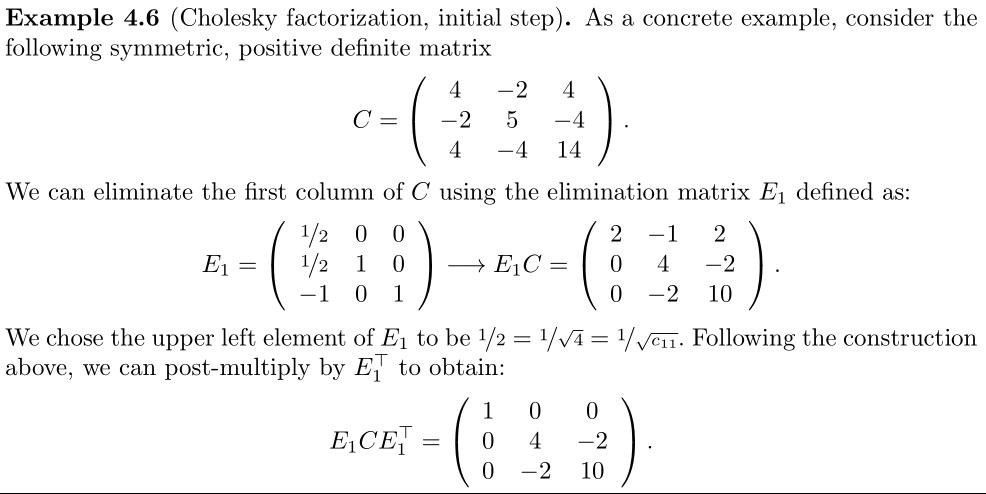

In [ ]:
# Book example
B = np.array([
    [4, -2, 4],
    [-2, 5, -4],
    [4, -4, 14]
])
B

array([[ 4, -2,  4],
       [-2,  5, -4],
       [ 4, -4, 14]])

In [ ]:
LCholesky = scipy.linalg.cholesky(B, lower=True)
LCholesky

array([[ 2.,  0.,  0.],
       [-1.,  2.,  0.],
       [ 2., -1.,  3.]])

In [ ]:
UCholesky = scipy.linalg.cholesky(B, lower=False)
UCholesky 

array([[ 2., -1.,  2.],
       [ 0.,  2., -1.],
       [ 0.,  0.,  3.]])

Check it by hand

In [ ]:
D1 = np.array([
    [1/2, 0, 0],
    [0,   1, 0],
    [0,   0, 1]
])
D1

array([[0.5, 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [ ]:
L1 = np.array([
    [1,  0, 0],
    [1,  1, 0],
    [-2, 0, 1]
])
L1

array([[ 1,  0,  0],
       [ 1,  1,  0],
       [-2,  0,  1]])

In [ ]:
D2 = np.array([
    [1, 0,   0],
    [0, 1/2, 0],
    [0, 0,   1]
])
D2

array([[1. , 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 1. ]])

In [ ]:
L2 = np.array([
    [1, 0,  0],
    [0, 1,  0],
    [0, 1, 1]
])
L2

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 1]])

In [ ]:
D3 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1/3]
])
D3

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.33333333]])

In [ ]:
LByHand = D3 @ L2 @ D2 @ L1 @ D1
LByHand

array([[ 0.5       ,  0.        ,  0.        ],
       [ 0.25      ,  0.5       ,  0.        ],
       [-0.25      ,  0.16666667,  0.33333333]])

In [ ]:
from scipy import linalg
LByHandInv = linalg.inv(LByHand)
LByHandInv

array([[ 2., -0., -0.],
       [-1.,  2., -0.],
       [ 2., -1.,  3.]])

In [ ]:
LCholesky

array([[ 2.,  0.,  0.],
       [-1.,  2.,  0.],
       [ 2., -1.,  3.]])

Cholesky 2 by 2

In [ ]:
C = np.array([
    [4, 2],
    [2, 9]
])
C

array([[4, 2],
       [2, 9]])

In [ ]:
L2by2 = scipy.linalg.cholesky(C, lower=True)
L2by2

array([[2.        , 0.        ],
       [1.        , 2.82842712]])